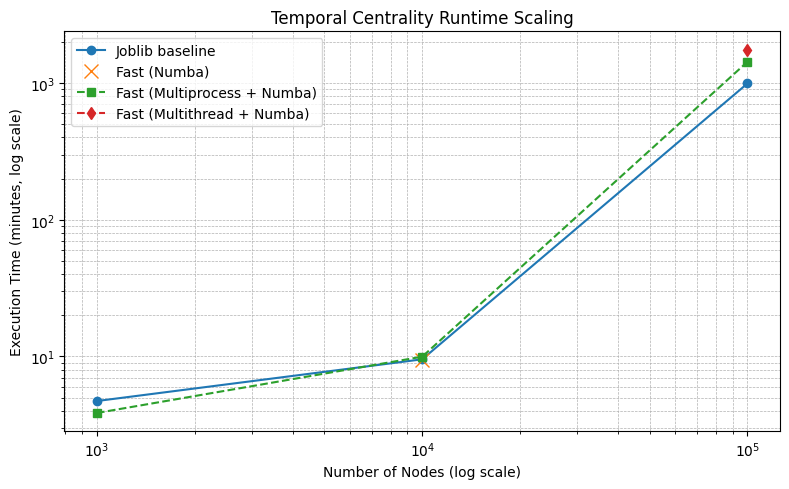

In [4]:
import matplotlib.pyplot as plt
import numpy as np

sizes = [1_000, 10_000, 100_000]

# your data
time_joblib = [4.72, 9.53, 994]
time_fast_numba = [None, 9.41, None]
time_fast_mp = [3.86, 9.96, 1432]
time_fast_thread = [None, None, 1761]

plt.figure(figsize=(8,5))
plt.loglog(sizes, time_joblib, 'o-', label='Joblib baseline')
plt.loglog([1e4], [9.41], 'x', markersize=10, label='Fast (Numba)')
plt.loglog(sizes, time_fast_mp, 's--', label='Fast (Multiprocess + Numba)')
plt.loglog([1e5], [1761], 'd--', label='Fast (Multithread + Numba)')

plt.xlabel('Number of Nodes (log scale)')
plt.ylabel('Execution Time (minutes, log scale)')
plt.title('Temporal Centrality Runtime Scaling')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1,) and (3,)

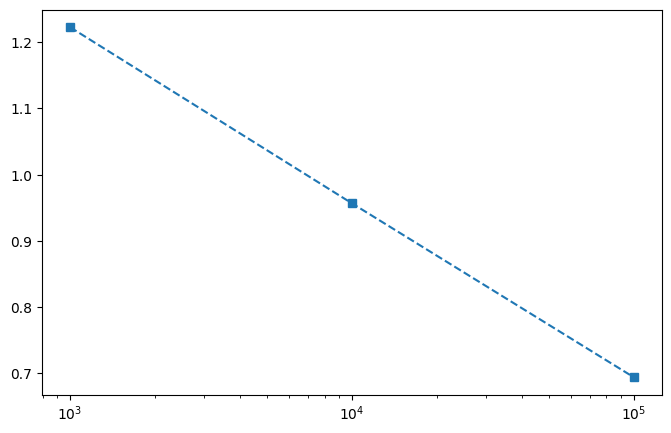

In [5]:
speedup_mp = np.array(time_joblib) / np.array(time_fast_mp)
speedup_thread = [None, None, 994/1761]

plt.figure(figsize=(8,5))
plt.semilogx(sizes, speedup_mp, 's--', label='Fast (Multiprocess + Numba)')
plt.semilogx([1e5], speedup_thread, 'd--', label='Fast (Multithread + Numba)')
plt.axhline(1, color='gray', linestyle='--', label='Baseline parity')
plt.xlabel('Number of Nodes (log scale)')
plt.ylabel('Speedup over Joblib baseline')
plt.title('Speedup vs Graph Size')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

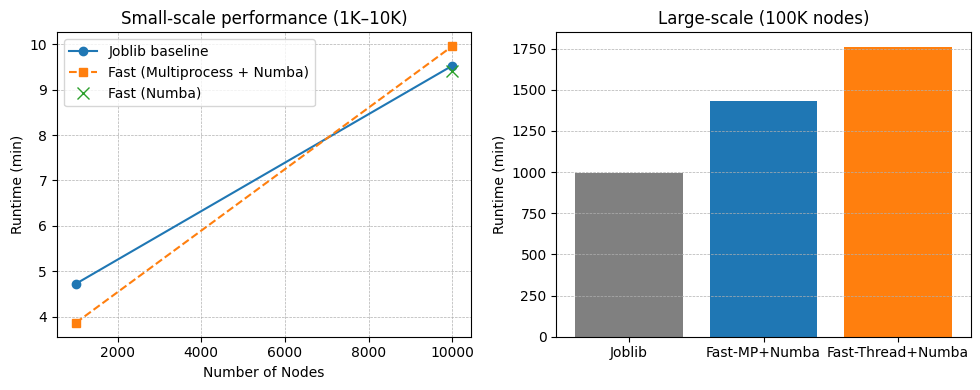

In [6]:
import matplotlib.pyplot as plt
import numpy as np

sizes_small = [1_000, 10_000]
sizes_large = ['100K']
time_joblib_small = [4.72, 9.53]
time_fast_mp_small = [3.86, 9.96]
time_fast_numba_small = [None, 9.41]
time_fast_thread_large = [1761]
time_fast_mp_large = [1432]
time_joblib_large = [994]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# ---- left: small-scale ----
axes[0].plot(sizes_small, time_joblib_small, 'o-', label='Joblib baseline')
axes[0].plot(sizes_small, time_fast_mp_small, 's--', label='Fast (Multiprocess + Numba)')
axes[0].plot([1e4], [9.41], 'x', markersize=8, label='Fast (Numba)')
axes[0].set_xlabel('Number of Nodes')
axes[0].set_ylabel('Runtime (min)')
axes[0].set_title('Small-scale performance (1K–10K)')
axes[0].grid(True, ls="--", lw=0.5)
axes[0].legend()

# ---- right: large-scale ----
bar_labels = ['Joblib', 'Fast-MP+Numba', 'Fast-Thread+Numba']
bar_values = [994, 1432, 1761]
axes[1].bar(bar_labels, bar_values, color=['gray', 'tab:blue', 'tab:orange'])
axes[1].set_title('Large-scale (100K nodes)')
axes[1].set_ylabel('Runtime (min)')
axes[1].grid(axis='y', ls="--", lw=0.5)

plt.tight_layout()
plt.show()


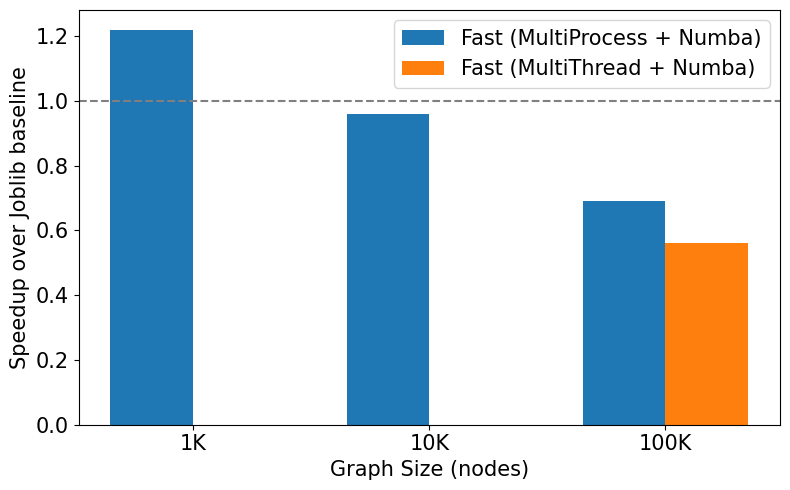

In [16]:
labels = ['1K', '10K', '100K']
speedup_mp = [1.22, 0.96, 0.69]
speedup_thread = [None, None, 0.56]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, speedup_mp, width, label='Fast (MultiProcess + Numba)')
ax.bar(x + width/2, [0, 0, 0.56], width, label='Fast (MultiThread + Numba)')
ax.axhline(1, color='gray', linestyle='--')
ax.set_ylabel('Speedup over Joblib baseline', fontsize=15 )
ax.set_xlabel('Graph Size (nodes)', fontsize=15 )
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=15)
plt.tight_layout()
plt.show()
